# Loan Application Status Prediction

## Importing Libraries

In [514]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Collection and Exploration

In [515]:
# Loading the dataset
df=pd.read_csv("loan.csv")

# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [516]:
# checking the number of rows and columns in the dataset
df.shape

(614, 13)

- In our dataset, we have 614 rows and 13 columns including our target varible "Loan_Status".

In [517]:
# checking all the column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [518]:
# getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Here we see that there are few null values in our dataset. We have 8 columns having object value types and 5 columns with numeric value types.

In [519]:
# checking the unique value counts for each feature
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Here we see that Loan_ID has 614 unique values. Its just the unique application ID and it will not have any impact on model building. We can drop it in pre-processing.

In [520]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In our dataset, many columns has missing values, some are categorical and some are numerical. We can fill categorical missing values using Mode and numerical missing values with Mean or Median depending on their distribution. Columns having missing values are :
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

<AxesSubplot:>

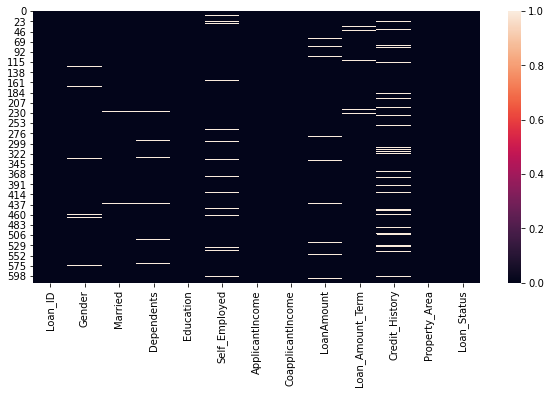

In [521]:
#plotting heatmap to view the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

- The White stripes in the heatmap shows the missing values for that column.

In [522]:
# checking the unique value counts for target variable "Loan_Status"
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- This shows that our dataset has more number of Approved loan applications. This means that there is data imbalance.

In [523]:
# checking unique value counts for Gender column
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

- In our dataset majority of the loan applications are by Male.

In [524]:
# checking unique value counts for "Married" column
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

- Majority of the applicants are Married and rest are not. 

In [525]:
# checking the unique value counts for "Dependents" column
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

- Majority of the population have zero dependents.

In [526]:
# checking unique value counts for "Education" column
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

- Majority of the loan applicants are Graduate.

In [527]:
# checking unique value counts for "Self_Employed" column
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

- Majority of the loan applicants are not Self_Employed.

In [528]:
# checking unique value counts for "Loan_Amount_Term" column
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

- Majority of the loan applicants have the loan term of 360 months.

In [529]:
# checking the unique value counts for "Credit_History" column
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

- Majority of the applicants has Credit History as 1.0 which means they are meeting the guideines for the loan to be approved. That means they have cleared their loans in past properly.

In [530]:
# checking the unique value counts for "Property_Area" column
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

- We have almost equal number of loan applicants from Semiurban and Urban areas and there are few from Rural areas.

In [531]:
# statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


#### Statistical Observations:
- Here we see that count for LoanAmount and Credit_History is not same as 614, which means there are missing values. We also have categorical columns which have missing values. We will treat these values further.
- The ApplicantIncome values ranges from 150 to 81000. Also there is a difference between 75th percentile and its max value, that means there could be extreme outliers present. 
- Except for LoanAmount and Credit_History, rest other columns have difference between Mean and Median, that means there distribution is not normal.
- Also we see there are chances of outliers to be present for CoapplicantIncome	and LoanAmount.

## Preprocessing the Dataset

### Treating Missing Values

We have missing values for the below columns:
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

#### Fill the missing values for numerical terms 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

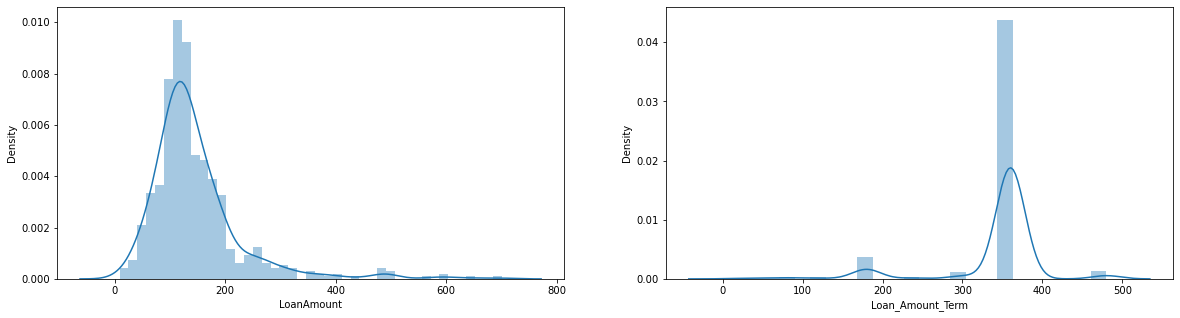

In [532]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.distplot(df["LoanAmount"])
plt.subplot(1,2,2)
sns.distplot(df["Loan_Amount_Term"])

#### Observations:
- The Loan Amount figure depicts that the density of Loan Amount is somehow normally distributed, though, it still carries outliers.
- The distribution for Loan Amount Term too is not normally distributed.

Lets impute the their null values with their median.

In [533]:
# LoanAmount
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
# Loan_Amount_Term
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

#### Fill the missing values for categorical terms

In [534]:
# Gender
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
# Married
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [535]:
# Self_Employed
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [536]:
# Dependents
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [537]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

Now, let's check the missing values!

In [538]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Great! All the missing values are filled!

## Exploratory Data Analysis

### A] Univariate Analysis

#### Categorical Columns' Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

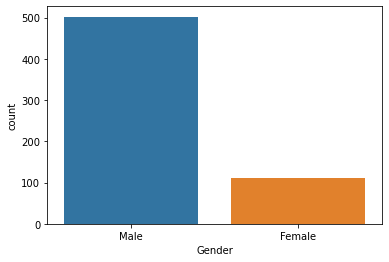

In [539]:
# Gender
sns.countplot(df['Gender'])

#### Observation:
- Majority of the applicants are Male. Only portion of the applicants are Female.

<AxesSubplot:xlabel='Married', ylabel='count'>

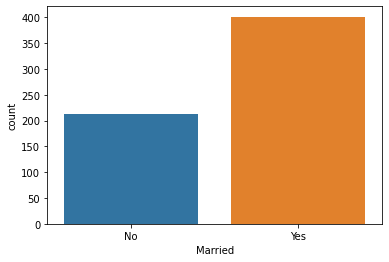

In [540]:
# Married
sns.countplot(df['Married'])

#### Observation:
- Majority of the applicants are Married.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

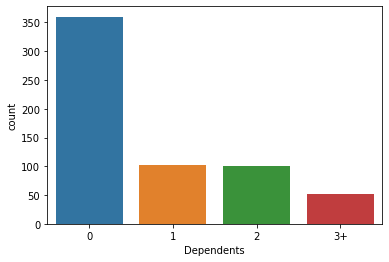

In [541]:
# Dependents
sns.countplot(df['Dependents'])

#### Observation:
- Most of the Loan applicants have No Dependents. 
- Around 100 applicants have 1 or 2 Dependents.
- Only applicants have 3 or more Dependents.

<AxesSubplot:xlabel='Education', ylabel='count'>

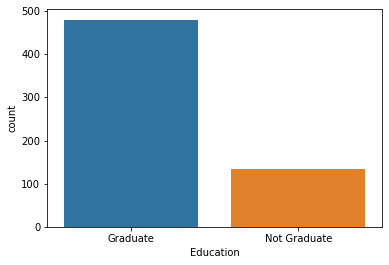

In [542]:
# Education
sns.countplot(df['Education'])

#### Observation:
- Majority of the applicants are Graduates and around 150 are Not Graduates.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

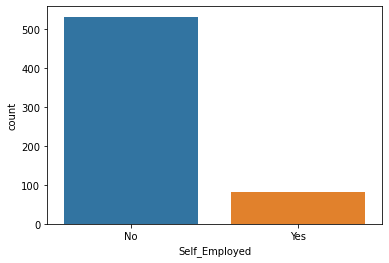

In [543]:
# Self_Employed
sns.countplot(df['Self_Employed'])

#### Observation:
- Majority of the applicants are not Self_Employed that means they are working.
- Around 95 applicants are Self_Employed, they may be running their own business.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

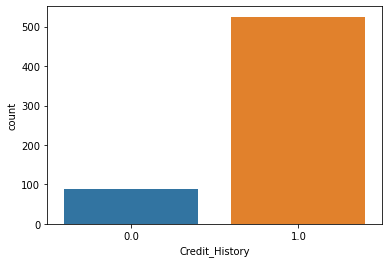

In [544]:
# Credit_History
sns.countplot(df['Credit_History'])

#### Observation:
- Majority of the applicants have a good Credit History. Around 130 applicants has a bad Credit History.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

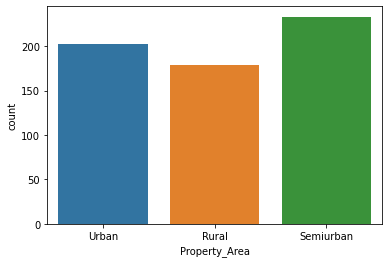

In [545]:
# Property_Area
sns.countplot(df['Property_Area'])

#### Observation:
- Here applicants are equally distributed in all the areas, Urban, SemiUrban and Rural.
- Semiurban has the majority, still there is not much difference.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

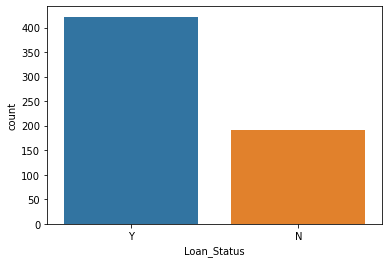

In [546]:
# Loan_Status
sns.countplot(df['Loan_Status'])

#### Observation:
- Majotrity of the loan applications are approved that is around 420.
- Around 190 loan applications are rejected. 
- Here we observe the data imbalance for our target variable. We shall treat it later.

#### Numerical Columns' Visualization

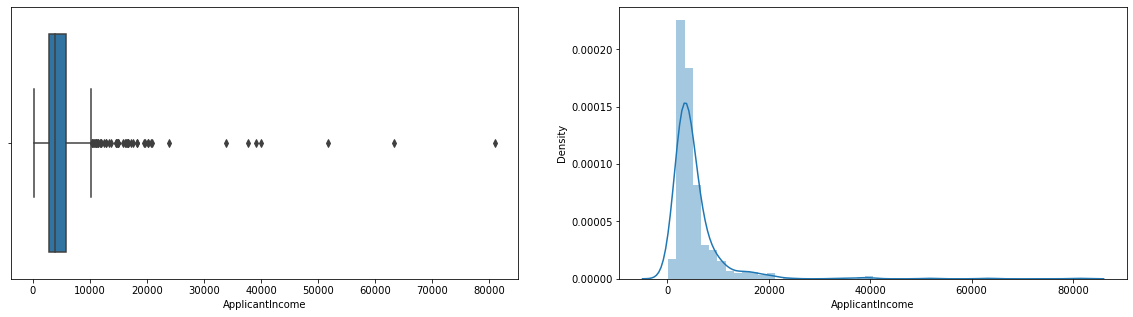

In [547]:
plt.figure(figsize=(20,5))

# ApplicantIncome
plt.subplot(1,2,1)
sns.boxplot(df["ApplicantIncome"])
plt.subplot(1,2,2)
sns.distplot(df["ApplicantIncome"]);

#### Observation:
- Majority of the Applicant Income are in the range 0 to 10000.
- There are very few who has 40000 and 80000 as their income.
- We can see that the Distribution is right skewed, most of the applicants are in right side. Also we observe few extreme outliers.

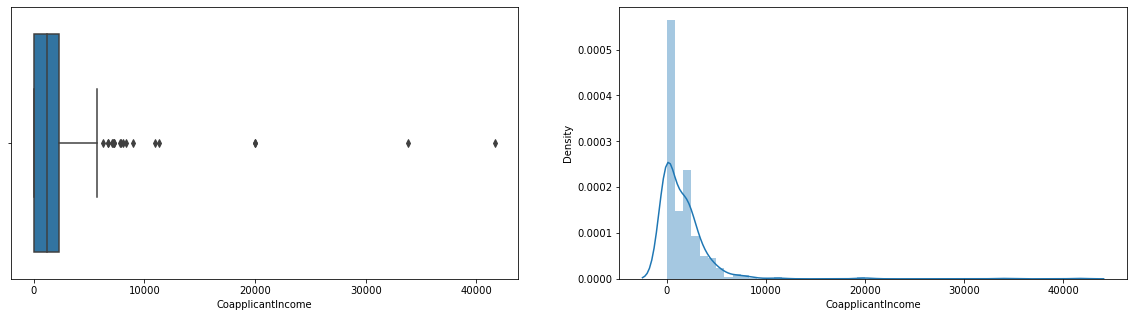

In [548]:
plt.figure(figsize=(20,5))

# CoapplicantIncome
plt.subplot(1,2,1)
sns.boxplot(df["CoapplicantIncome"])
plt.subplot(1,2,2)
sns.distplot(df["CoapplicantIncome"]);

#### Observation:
- Majority of the CoApplicant Income are in the range 0 to 5000.
- Here also the Distribution is right skewed and its not suitable for our model building. Also there are few extreme outliers.

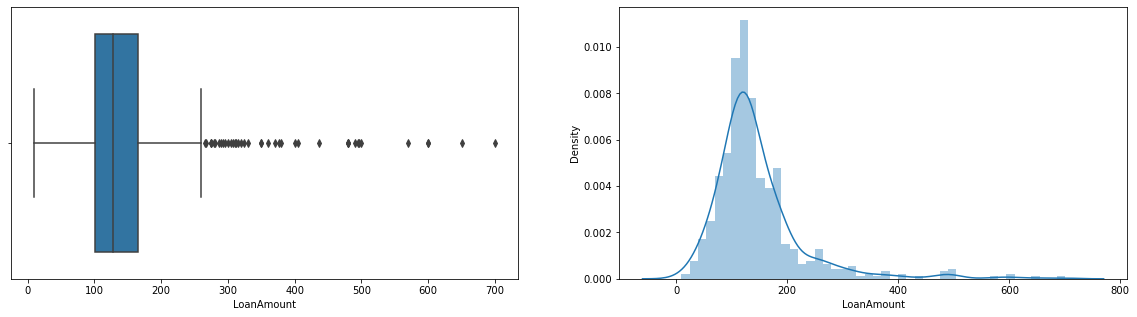

In [549]:
plt.figure(figsize=(20,5))

# LoanAmount
plt.subplot(1,2,1)
sns.boxplot(df["LoanAmount"])
plt.subplot(1,2,2)
sns.distplot(df["LoanAmount"]);

#### Observation:
- Majority of the LoanAmount ranges from 80 to 180. 
- LoanAmount distribution is somewhat good but still its not in the normalized form, it is slightly right skewed. 
- There are few extreme outliers present.

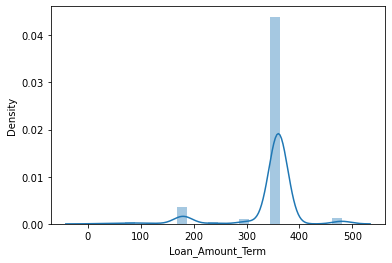

In [550]:
# Loan_Amount_Term
sns.distplot(df["Loan_Amount_Term"]);

#### Observation:
- Majority of the Loan_Amount_Term values are filled with its Median value that is 360.
- The distribution is normal.

### B] Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

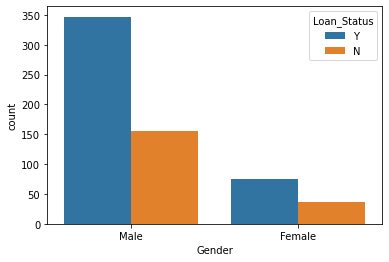

In [551]:
sns.countplot(x="Gender",hue='Loan_Status',data=df)

#### Observation:
- Male applicants are more likely to be granted loans.

<AxesSubplot:xlabel='Married', ylabel='count'>

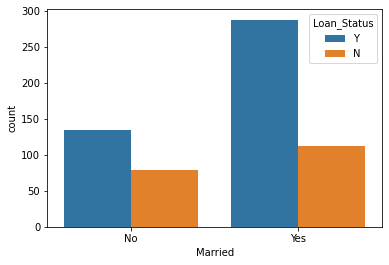

In [552]:
sns.countplot(x="Married",hue='Loan_Status',data=df)

#### Observation:
- Married applicants are more likely to be granted loans.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

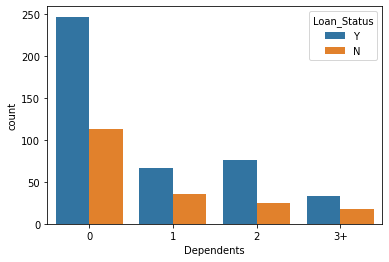

In [553]:
sns.countplot(x="Dependents",hue='Loan_Status',data=df)

#### Observation:
- Majority of the population have zero dependents and are likely to accepted for loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

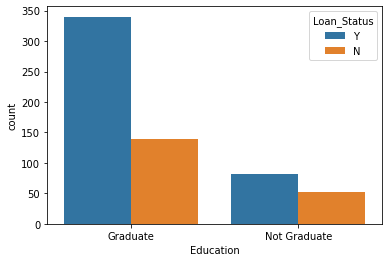

In [554]:
sns.countplot(x="Education",hue='Loan_Status',data=df)

#### Observation:
- Graduates have higher propotion of Loan approval.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

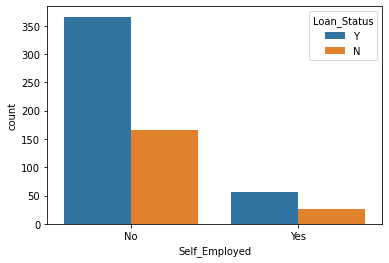

In [555]:
sns.countplot(x="Self_Employed",hue='Loan_Status',data=df)

#### Observation:
- Applicants who are not Self Employed are likely to be granted loans.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

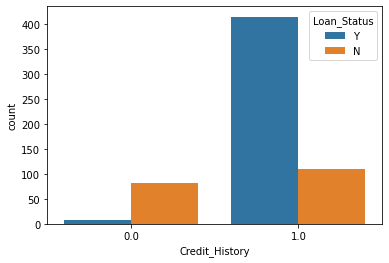

In [556]:
sns.countplot(x="Credit_History",hue='Loan_Status',data=df)

#### Observation:
- Applicant with credit history are far more likely to be accepted.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

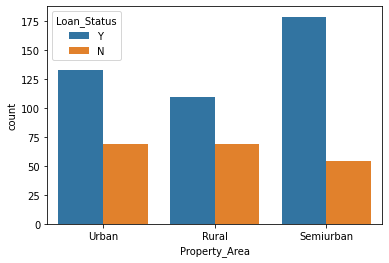

In [557]:
sns.countplot(x="Property_Area",hue='Loan_Status',data=df)

#### Observation:
- Applicants from Semi-urban are likely to be granted loans.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

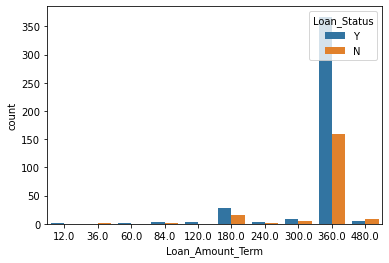

In [558]:
sns.countplot(x="Loan_Amount_Term",hue='Loan_Status',data=df)

#### Observation:
- Majority of the loans taken are for 360 Months (30 years).

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

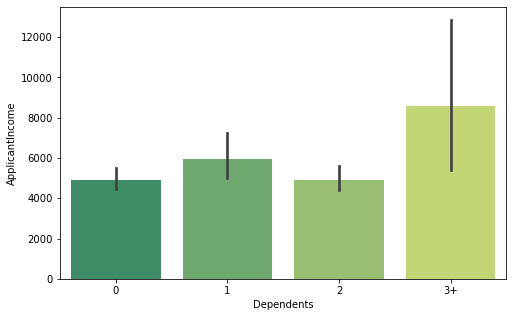

In [559]:
plt.figure(figsize=(8,5))
sns.barplot('Dependents','ApplicantIncome',data=df,palette='summer')

#### Observation:
- Applicants with 3 or more dependents have more income compare to other applicants.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

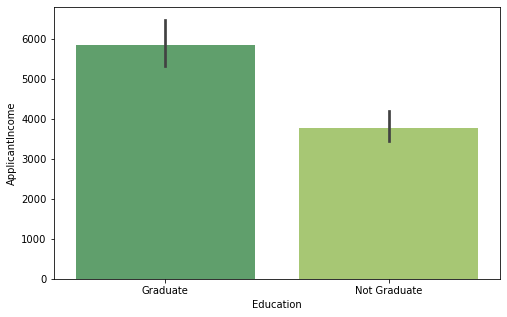

In [560]:
plt.figure(figsize=(8,5))
sns.barplot('Education','ApplicantIncome',data=df,palette='summer')

#### Observation:
- Graduate applicants have more income than those who are not graduated.

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

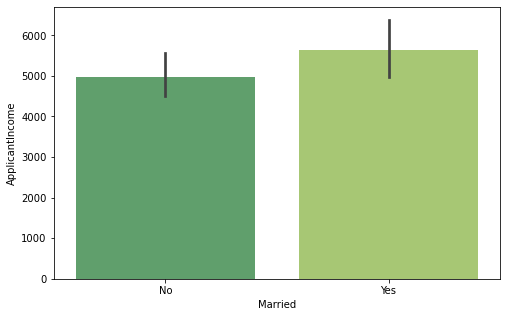

In [561]:
plt.figure(figsize=(8,5))
sns.barplot('Married','ApplicantIncome',data=df,palette='summer')

#### Observation:
- Married applicants have slightly more income than Unmarried.

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

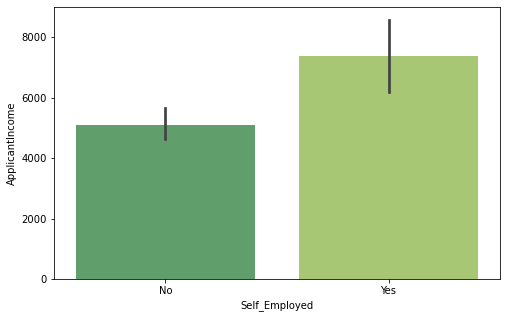

In [562]:
plt.figure(figsize=(8,5))
sns.barplot('Self_Employed','ApplicantIncome',data=df,palette='summer')

#### Observation:
Self_Employed applicants have more income than those who are not Self_Employed.

### Creation of New Attributes

- Here the ApplicantIncome and CoapplicantIncome can be added together to create a new attribute called "Total_Income" because are from the same family.

In [563]:
# total_income
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


- New column "Total_Income" is added successfully!

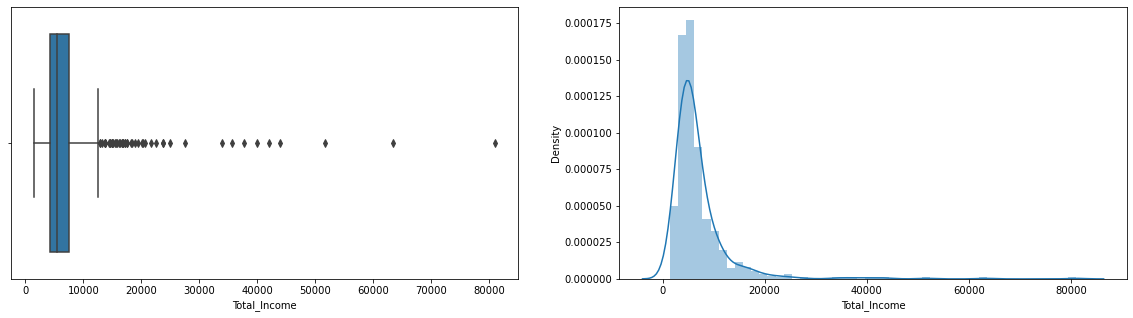

In [564]:
plt.figure(figsize=(20,5))

# Total_Income
plt.subplot(1,2,1)
sns.boxplot(df["Total_Income"])
plt.subplot(1,2,2)
sns.distplot(df["Total_Income"]);

### One hot Encoding

In [565]:
# Education
df['Education']=df['Education'].replace({"Graduate":1,"Not Graduate":0})

# Dependents
df['Dependents']=df['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})

# Property_Area
df['Property_Area']=df['Property_Area'].replace({"Rural":0,"Semiurban":1,"Urban":2})

# Loan_Status
df['Loan_Status']=df['Loan_Status'].replace({"Y":1,"N":0})

In [566]:
# Gender, Married, Self_Employed
df=pd.get_dummies(df,columns=["Gender",'Married','Self_Employed'])
df.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,LP001002,0,1,5849,0.0,128.0,360.0,1.0,2,1,5849.0,0,1,1,0,1,0
1,LP001003,1,1,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0,1,0,1,1,0
2,LP001005,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,0,1,0,1,0,1
3,LP001006,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0,1,0,1,1,0
4,LP001008,0,1,6000,0.0,141.0,360.0,1.0,2,1,6000.0,0,1,1,0,1,0


- With this all the categorical columns are converted to numericals!

### Correlation Matrix

<AxesSubplot:>

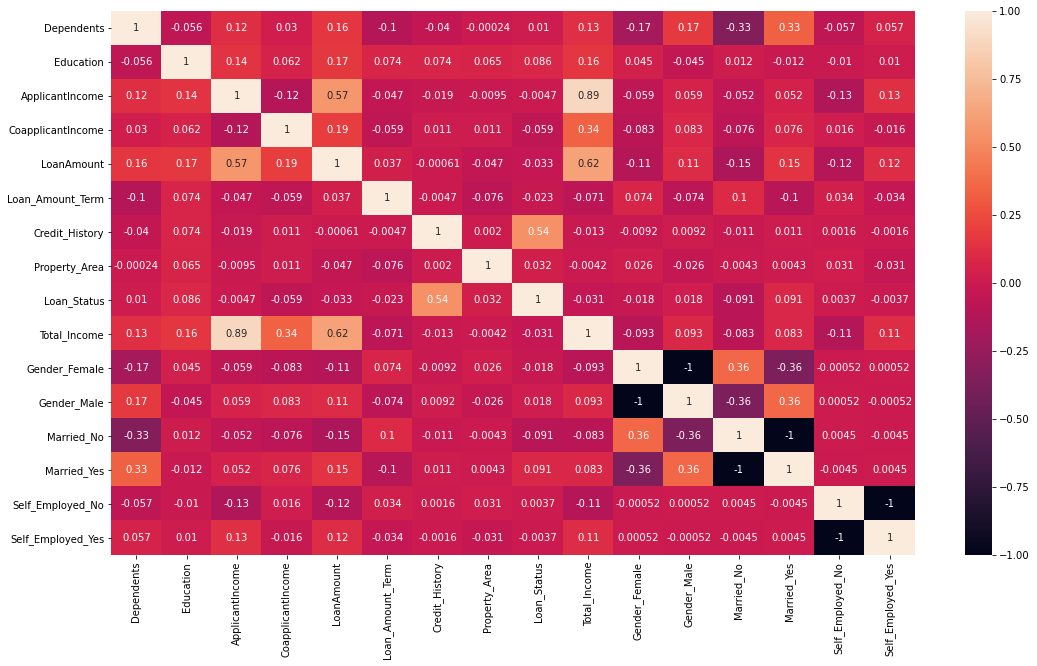

In [568]:
# checking correlation
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

#### Observations:
- Target variable "Loan_Status" is highly correlated with "Credit_History" and it is least correlated with "Gender", "Loan_Term_Amount" and "Self_Employed".
- Newly created attribute "Total_Income" is highly correlated with "ApplicantIncome", "CoapplicantIncome" and "LoanAmount". This may create mullticollinearity problem. 
- "Married" and "Gender" are also somewhat correlated with each other.

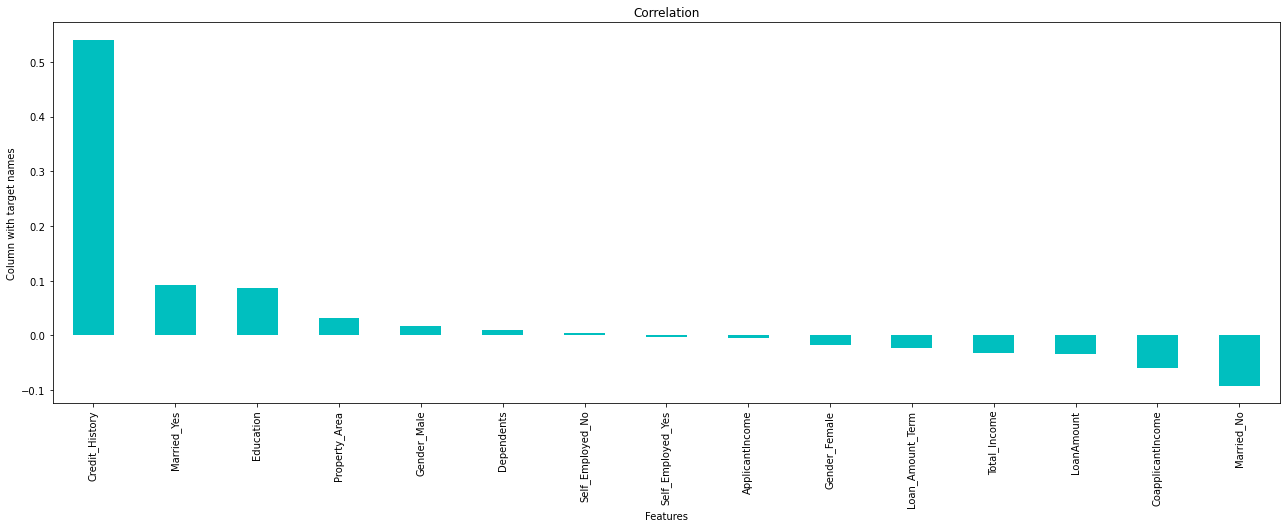

In [571]:
#Plotting bar graph to see strong and weak correlation in graphical form.
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

- Here also we see that "ApplicantIncome","Self_Employed_No",'Self_Employed_Yes' are least correlated with the target variable. We can remove these columns for better model building.

### Deleting Unwanted Columns

In [572]:
df=df.drop(["Loan_ID","ApplicantIncome","Self_Employed_No",'Self_Employed_Yes'],axis=1)

### Removing Outliers:

In [573]:
#removing outliers for "ApplicantIncome",'CoapplicantIncome','LoanAmount' columns
from scipy.stats import zscore
z=np.abs(zscore(df[["Total_Income",'LoanAmount','CoapplicantIncome']]))
df_new=df[(z<3).all(axis=1)]

#### Plotting boxplots after removing outliers

<AxesSubplot:xlabel='CoapplicantIncome'>

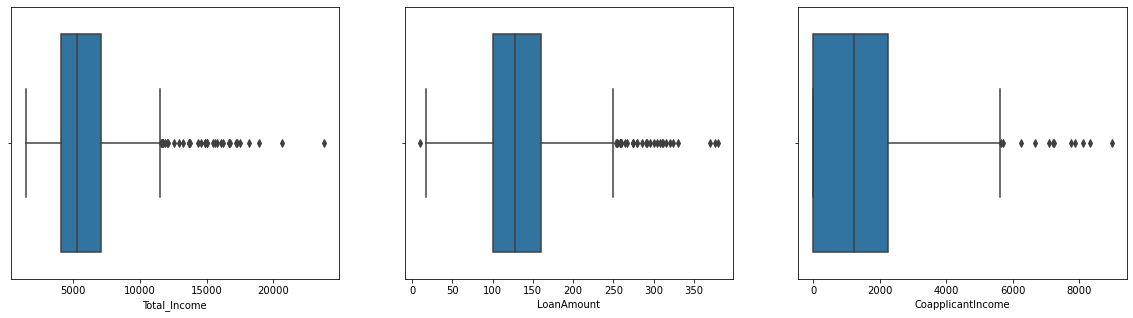

In [614]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(df_new["Total_Income"])
plt.subplot(1,3,2)
sns.boxplot(df_new["LoanAmount"])
plt.subplot(1,3,3)
sns.boxplot(df_new["CoapplicantIncome"])

- Even after removing outliers, there are some present.

In [575]:
# checking number of rows and columns after removing outliers
df_new.shape

(590, 13)

- After removing outliers we have 590 rows and 13 columns.

### Percentage of data loss:

In [576]:
# checking percentage of data loss
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

3.91 %


- There is 3.91% of data loss with the outlier removal. To some extent outliers are removed

### Creating X an Y Split

In [577]:
# Splitting data into X and Y
x=df_new.drop(columns=["Loan_Status"],axis=1)
y=df_new["Loan_Status"]

In [578]:
x.head()

,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0,1,0.0,128.0,360.0,1.0,2,5849.0,0,1,1,0
1,1,1,1508.0,128.0,360.0,1.0,0,6091.0,0,1,0,1
2,0,1,0.0,66.0,360.0,1.0,2,3000.0,0,1,0,1
3,0,0,2358.0,120.0,360.0,1.0,2,4941.0,0,1,0,1
4,0,1,0.0,141.0,360.0,1.0,2,6000.0,0,1,1,0


### Treating Imbalanced Data

In [580]:
# Doing over sampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [581]:
# checking value counts for target variable after balancing data
y.value_counts()

1    408
0    408
Name: Loan_Status, dtype: int64

- Now, our dataset variable is balanced.

### Checking and Removing Skewness

In [582]:
# skewness before removing outliers
df.skew()

Dependents           1.015551
Education           -1.367622
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
Total_Income         5.633449
Gender_Female        1.648795
Gender_Male         -1.648795
Married_No           0.644850
Married_Yes         -0.644850
dtype: float64

- This is the skewness before removing outliers.

In [583]:
# skewness after removing outliers
x.skew()

Dependents           1.187569
Education           -1.019346
CoapplicantIncome    1.248702
LoanAmount           1.193359
Loan_Amount_Term    -2.546765
Credit_History      -1.255456
Property_Area        0.113957
Total_Income         1.688084
Gender_Female        1.996764
Gender_Male         -1.324600
Married_No           0.829114
Married_Yes         -0.343811
dtype: float64

- After removing outliers, Skewness is also reduced but not completely. Here we have skewness for the below columns:
 - LoanAmount
 - CoapplicantIncome
 - Total_Income

In [586]:
x['LoanAmount']=np.sqrt(x['LoanAmount'])
x['CoapplicantIncome']=np.sqrt(x['CoapplicantIncome'])

In [587]:
x['Total_Income']=np.log1p(x['Total_Income'])

In [588]:
x.skew()

Dependents           1.187569
Education           -1.019346
CoapplicantIncome    0.216678
LoanAmount           0.378998
Loan_Amount_Term    -2.546765
Credit_History      -1.255456
Property_Area        0.113957
Total_Income         0.245501
Gender_Female        1.996764
Gender_Male         -1.324600
Married_No           0.829114
Married_Yes         -0.343811
dtype: float64

- Now, the all the skew values are between -0.5 to +0.5.

### Scaling

- There is a difference between the range of values for many independent variables. Hence, we are scaling.

In [590]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
x_scaled=MM.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [591]:
x.head()

,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0.000000,1.0,0.000000,0.504057,0.74359,1.0,1.0,0.499341,0.0,1.0,1.0,0.0
1,0.333333,1.0,0.409791,0.504057,0.74359,1.0,0.0,0.513802,0.0,1.0,0.0,1.0
2,0.000000,1.0,0.000000,0.310668,0.74359,1.0,1.0,0.261216,0.0,1.0,0.0,1.0
3,0.000000,0.0,0.512429,0.482275,0.74359,1.0,1.0,0.439168,0.0,1.0,0.0,1.0
4,0.000000,1.0,0.000000,0.538048,0.74359,1.0,1.0,0.508432,0.0,1.0,1.0,0.0


- Now, all the features values are scaled and the model building will not be biased.
- As we have only 12 features in our dataset, we will not perform PCA.

## Building the Model

In [592]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [593]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.8816326530612245  on Random State  9


- Using the best Random State to create new train_test_split.

In [594]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [595]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1.LogisticRegression

In [596]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[ 92  26]
 [  3 124]] 

Accuracy Score: 88.16326530612245
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       118
           1       0.83      0.98      0.90       127

    accuracy                           0.88       245
   macro avg       0.90      0.88      0.88       245
weighted avg       0.89      0.88      0.88       245



#### 2.AdaBoostClassifier

In [597]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[ 94  24]
 [ 12 115]] 

Accuracy Score: 85.3061224489796
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       118
           1       0.83      0.91      0.86       127

    accuracy                           0.85       245
   macro avg       0.86      0.85      0.85       245
weighted avg       0.86      0.85      0.85       245



#### 3.RandomForestClassifier

In [598]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[103  15]
 [ 12 115]] 

Accuracy Score: 88.9795918367347
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       118
           1       0.88      0.91      0.89       127

    accuracy                           0.89       245
   macro avg       0.89      0.89      0.89       245
weighted avg       0.89      0.89      0.89       245



#### 4.SVC

In [599]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[ 90  28]
 [  2 125]] 

Accuracy Score: 87.75510204081633
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       118
           1       0.82      0.98      0.89       127

    accuracy                           0.88       245
   macro avg       0.90      0.87      0.88       245
weighted avg       0.89      0.88      0.88       245



- Here, we observe that RandomForestClassifier is giving the highest accuracy score of 89%. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [601]:
# importing cross validation module
from sklearn.model_selection import cross_val_score

In [602]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.8200134670058358


In [603]:
print(cross_val_score(AD,x,y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.8163250037408348


In [604]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.8420469848870269


In [605]:
print(cross_val_score(SC,x,y,cv=5).mean()) #cross validation score for SVC

0.8224674547358971


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

### Hyper Parameter Tuning

- Now, let's apply Hyper Paramter Tuning on the best model to improve the r2 score.

In [607]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [608]:
parameters={'n_estimators':[50,60,80,100,110],
          'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8,9],
          'min_samples_split':[10,12,15,17]}

In [609]:
GCVRFC=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCVRFC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [10, 12, 15, 17],
                         'n_estimators': [50, 60, 80, 100, 110]})

In [610]:
GCVRFC.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 17,
 'n_estimators': 50}

In [611]:
Final_modRFC=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=17,n_estimators=50)
Final_modRFC.fit(x_train,y_train)
pred=Final_modRFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[ 96  22]
 [  4 123]] 

Accuracy Score: 89.38775510204081
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       118
           1       0.85      0.97      0.90       127

    accuracy                           0.89       245
   macro avg       0.90      0.89      0.89       245
weighted avg       0.90      0.89      0.89       245



- After Hyper Parameter tuning, the improved score of the best model RandomForestClassifier is 89%

#### Plotting AUC_ROC curve

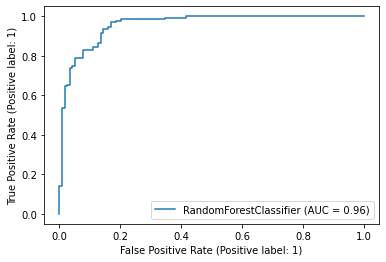

In [612]:
metrics.plot_roc_curve(Final_modRFC, x_test, y_test)

- The AUC score is 0.96

## Saving the Model

In [615]:
import joblib
joblib.dump(Final_modRFC,"Loan_Application.pkl")

['Loan_Application.pkl']